# Name: Hania Rasheed
# Registration No: B23S0983DS009
# Program: BS DS - 23 (S)
# Date: 7 March, 2025

## ---------------------------------------------------------------------------------------------------------------


Before Starting the Scenario Task Implement all the code given in the manual and implement it on any image  



In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### The Discrete Fourier Transform (DFT):

 The Discrete Fourier Transform (DFT) is a mathematical technique used to convert an image from the spatial domain to the frequency domain. This transformation
 helps in analyzing and processing images by breaking them down into different frequency components.

 #### Uses of DFT
 - Image filtering (blurring, sharpening, and edge detection)
 - Image compression (JPEG uses DFT-related methods)
 - Noise reduction in images
 - Signal and image reconstruction


 Basic Syntax : cv2.dft(src, flags)

(-0.5, 276.5, 264.5, -0.5)

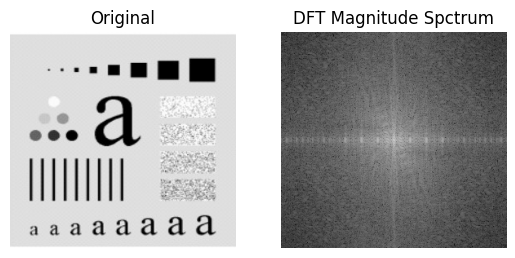

In [9]:
img = cv2.imread('src.jpg', cv2.IMREAD_GRAYSCALE)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap = 'gray')
plt.axis('off')


plt.subplot(1,2,2)
plt.title("DFT Magnitude Spctrum")
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.axis('off')


 ### Inverse Discrete Fourier Transform (IDFT):

 The Inverse Discrete Fourier Transform (IDFT) is used to convert an image from the frequency domain back to the spatial domain.

 #### Uses of IDFT
 - Reconstructing images after applying frequency filters
 - Restoring images from their frequency components

 Basic Syntax : cv2.idft(src, flags)

(-0.5, 276.5, 264.5, -0.5)

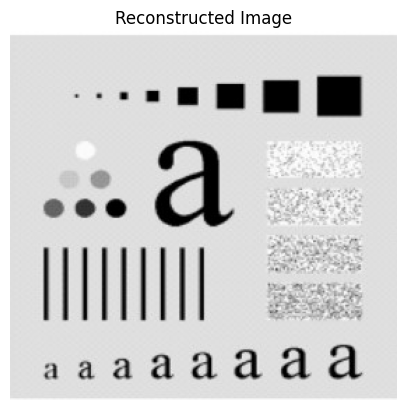

In [10]:
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.title("Reconstructed Image")
plt.imshow(img_back, cmap = 'gray')
plt.axis('off')

### Low-Pass Filtering (Smoothing):

 A low-pass filter (LPF) removes high-frequency details in an image, leading to a blurring or smoothing effect.

 Uses of Low-Pass Filters:
 - Removing noise from images
 - Image smoothing for better feature extraction
 - Preparing images for segmentation

 Basic Syntax : mask = np.zeros((rows, cols, 2), np.uint8)

 mask[crow-30:crow+30, ccol-30:ccol+30] = 1


#### *In Low Pass Filtering by increasing the mask size we get a sharper image and by decreasing the mask size we get more blurred image.*

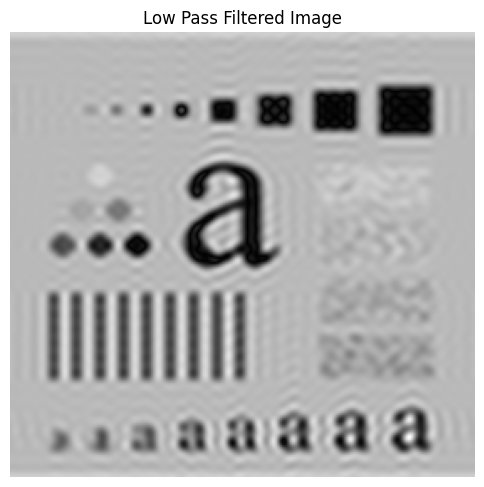

In [33]:
# Load image and convert to grayscale
img = cv2.imread('src.jpg', 0)  # Ensure grayscale loading

# Compute DFT
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Shift zero frequency to the center

# Create Low-Pass Filter Mask
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1  # Larger area for better low-pass filtering

# Apply Mask
fshift = dft_shift * mask  # Apply mask in frequency domain

# Inverse DFT
f_ishift = np.fft.ifftshift(fshift)  # Shift back
img_filtered = cv2.idft(f_ishift)
img_filtered = cv2.magnitude(img_filtered[:, :, 0], img_filtered[:, :, 1])  # Compute magnitude

# Normalize for display
img_filtered = cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX)
img_filtered = np.uint8(img_filtered)

# Display
plt.figure(figsize=(6,6))
plt.title("Low Pass Filtered Image")
plt.imshow(img_filtered, cmap='gray')
plt.axis('off')
plt.show()


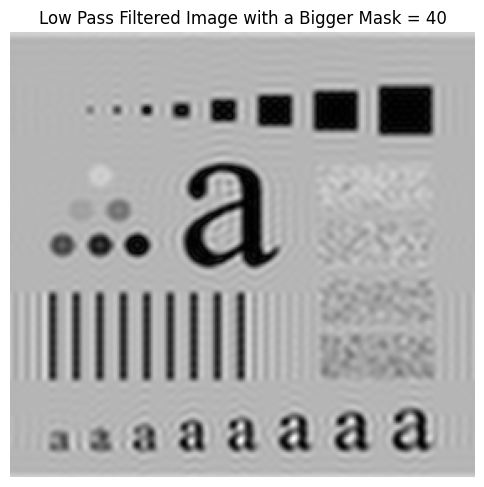

In [35]:
# Compute DFT
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Shift zero frequency to the center

# Create Low-Pass Filter Mask
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-40:crow+40, ccol-40:ccol+40] = 1  # Larger area for better low-pass filtering

# Apply Mask
fshift = dft_shift * mask  # Apply mask in frequency domain

# Inverse DFT
f_ishift = np.fft.ifftshift(fshift)  # Shift back
img_filtered = cv2.idft(f_ishift)
img_filtered = cv2.magnitude(img_filtered[:, :, 0], img_filtered[:, :, 1])  # Compute magnitude

# Normalize for display
img_filtered = cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX)
img_filtered = np.uint8(img_filtered)

# Display
plt.figure(figsize=(6,6))
plt.title("Low Pass Filtered Image with a Bigger Mask = 40")
plt.imshow(img_filtered, cmap='gray')
plt.axis('off')
plt.show()


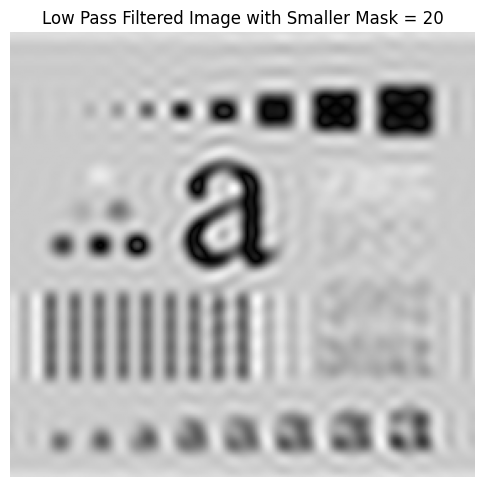

In [36]:
# Compute DFT
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Shift zero frequency to the center

# Create Low-Pass Filter Mask
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-20:crow+20, ccol-20:ccol+20] = 1  # Larger area for better low-pass filtering

# Apply Mask
fshift = dft_shift * mask  # Apply mask in frequency domain

# Inverse DFT
f_ishift = np.fft.ifftshift(fshift)  # Shift back
img_filtered = cv2.idft(f_ishift)
img_filtered = cv2.magnitude(img_filtered[:, :, 0], img_filtered[:, :, 1])  # Compute magnitude

# Normalize for display
img_filtered = cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX)
img_filtered = np.uint8(img_filtered)

# Display
plt.figure(figsize=(6,6))
plt.title("Low Pass Filtered Image with Smaller Mask = 20")
plt.imshow(img_filtered, cmap='gray')
plt.axis('off')
plt.show()


### High-Pass Filtering (Sharpening)
 A high-pass filter (HPF) enhances high-frequency components, sharpening image details.

 Uses of High-Pass Filters
 - Enhancing edges and fine details
 - Feature extraction in medical and satellite imaging
 - Image sharpening in preprocessing tasks

 Basic Syntax : mask = np.ones((rows, cols, 2), np.uint8)

 mask[crow-30:crow+30, ccol-30:ccol+30] = 0


#### *In High Pass Filtering by decreasing the mask size we get a sharper image and by increasing the mask size we get more blurred image.*

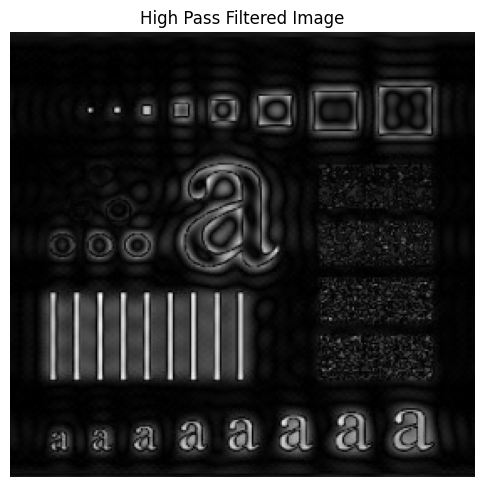

In [32]:
# Compute DFT
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Shift zero frequency to center

# Create High-Pass Filter Mask
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

mask1 = np.ones((rows, cols, 2), np.uint8)
mask1[crow-15:crow+15, ccol-15:ccol+15] = 0

# Apply mask
f_shift = dft_shift * mask1

# Inverse DFT
f_ishift = np.fft.ifftshift(f_shift)  # Shift back
img_filtered1 = cv2.idft(f_ishift)
img_filtered1 = cv2.magnitude(img_filtered1[:, :, 0], img_filtered1[:, :, 1])  # Compute magnitude

# Normalize for display
img_filtered1 = cv2.normalize(img_filtered1, None, 0, 255, cv2.NORM_MINMAX)
img_filtered1 = np.uint8(img_filtered1)

# Display
plt.figure(figsize=(6,6))
plt.title("High Pass Filtered Image")
plt.imshow(img_filtered1, cmap='gray')
plt.axis('off')
plt.show()


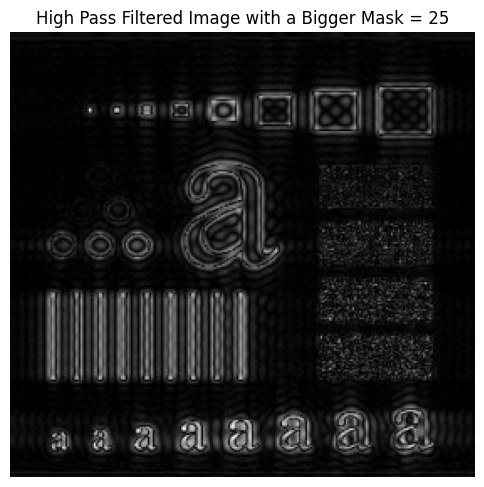

In [40]:
# Compute DFT
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Shift zero frequency to center

# Create High-Pass Filter Mask
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

mask1 = np.ones((rows, cols, 2), np.uint8)
mask1[crow-25:crow+25, ccol-25:ccol+25] = 0

# Apply mask
f_shift = dft_shift * mask1

# Inverse DFT
f_ishift = np.fft.ifftshift(f_shift)  # Shift back
img_filtered1 = cv2.idft(f_ishift)
img_filtered1 = cv2.magnitude(img_filtered1[:, :, 0], img_filtered1[:, :, 1])  # Compute magnitude

# Normalize for display
img_filtered1 = cv2.normalize(img_filtered1, None, 0, 255, cv2.NORM_MINMAX)
img_filtered1 = np.uint8(img_filtered1)

# Display
plt.figure(figsize=(6,6))
plt.title("High Pass Filtered Image with a Bigger Mask = 25")
plt.imshow(img_filtered1, cmap='gray')
plt.axis('off')
plt.show()


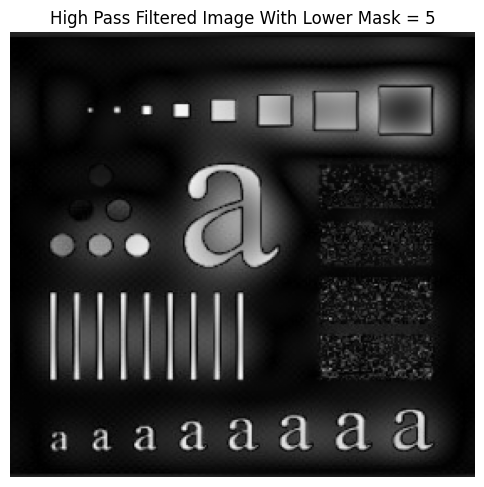

In [38]:
# Compute DFT
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Shift zero frequency to center

# Create High-Pass Filter Mask
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

mask1 = np.ones((rows, cols, 2), np.uint8)
mask1[crow-5:crow+5, ccol-5:ccol+5] = 0

# Apply mask
f_shift = dft_shift * mask1

# Inverse DFT
f_ishift = np.fft.ifftshift(f_shift)  # Shift back
img_filtered1 = cv2.idft(f_ishift)
img_filtered1 = cv2.magnitude(img_filtered1[:, :, 0], img_filtered1[:, :, 1])  # Compute magnitude

# Normalize for display
img_filtered1 = cv2.normalize(img_filtered1, None, 0, 255, cv2.NORM_MINMAX)
img_filtered1 = np.uint8(img_filtered1)

# Display
plt.figure(figsize=(6,6))
plt.title("High Pass Filtered Image With Lower Mask = 5")
plt.imshow(img_filtered1, cmap='gray')
plt.axis('off')
plt.show()
